# Sample programs

## 数当てゲーム

In [1]:
import random

N = 100

com = random.randrange(1, 100)
print(f'私の考えている数(1から{N})を当ててください')

while True:
    man = int(input('数を入力'))
    if man > com:
        print('大きすぎます')
    elif man < com:
        print('小さすぎます')
    else:
        print('その通り')
        break

私の考えている数(1から100)を当ててください
数を入力50
大きすぎます
数を入力25
小さすぎます
数を入力37
小さすぎます
数を入力43
大きすぎます
数を入力40
小さすぎます
数を入力41
その通り


## グラフ (基本)

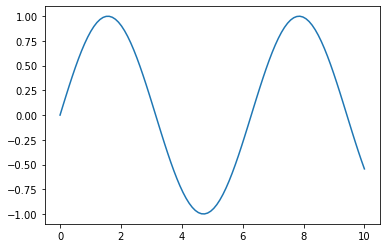

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

## リサジュー図形

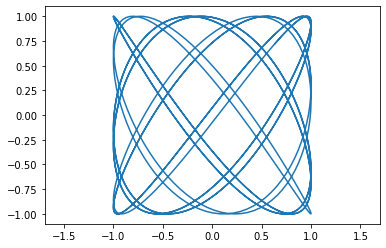

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

N = 1000
THETA_MAX = 10

NX = 7
NY = 9
DELTA = 0.3

xpoints = []
ypoints = []
for i in range(N + 1):
    theta = THETA_MAX / N * i
    x = math.cos(NX * theta)
    y = math.sin(NY * theta + DELTA)
    xpoints.append(x)
    ypoints.append(y)

plt.axis('equal')
plt.plot(xpoints, ypoints)
plt.show()

## シーザー暗号

In [4]:
def encript(string, shift):
    result = ''
    for s in string:
        code = ord(s)
        if 65 <= code <= 90:
            code = code + shift
            if code > 90:
                code = code - 26
        result = result + chr(code)
    return result

text1 = 'PYTHON IS AWESOME!'
text2 = encript(text1, 3)
text3 = encript(text2, 23)

print(text1)
print(text2)
print(text3)

PYTHON IS AWESOME!
SBWKRQ LV DZHVRPH!
PYTHON IS AWESOME!


## モンテカルロ法

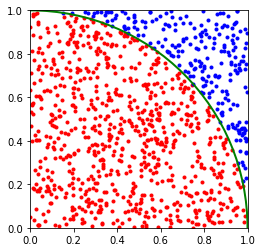

結果: 3.076
誤差: 0.09727166082677935


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

N = 1000
count = 0

xpoints_inside = []
ypoints_inside = []
xpoints_outside = []
ypoints_outside = []

for i in range(N):
    x = random.random()
    y = random.random()
    if x**2 + y**2 < 1:
        count += 1
        xpoints_inside.append(x)
        ypoints_inside.append(y)
    else:
        xpoints_outside.append(x)
        ypoints_outside.append(y)

c1 = plt.Circle((0, 0), radius=1, fc="none", ec="green", linewidth=2)
plt.gca().add_patch(c1)
plt.axis('scaled')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.scatter(xpoints_inside, ypoints_inside, c="red", marker=".")
plt.scatter(xpoints_outside, ypoints_outside, c="blue", marker=".")
plt.show()

result = count / N * 4
error = result / N ** 0.5  # rough estimate

print(f"結果: {result}")
print(f"誤差: {error}")

## フラクタル

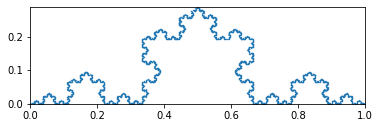

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

N = 10000

xpoints = []
ypoints = []

x = 0
y = 0

sqrt3 = 3 ** 0.5

for i in range(N):
    r = random.random()
    if r < 0.5:
        x_next = 1 / 2 * x + sqrt3 / 6 * y
        y_next = sqrt3 / 6 * x - 1 / 2 * y
    else:
        x_next = 1 / 2 * x - sqrt3 / 6 * y + 1 / 2
        y_next = - sqrt3 / 6 * x - 1 / 2 * y + sqrt3 / 6
    x = x_next
    y = y_next
    
    xpoints.append(x)
    ypoints.append(y)

plt.axis('scaled')
plt.xlim(0, 1)
plt.ylim(0, sqrt3 / 6)
plt.scatter(xpoints, ypoints, s=0.1, marker=".")
plt.show()

## セルオートマトン

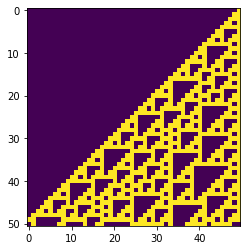

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

SIZE = 50
GENERATION = 50

rule = [0, 1, 1, 1, 0, 1, 1, 0]

history = []

cells = [0] * SIZE

for i in range(SIZE):
    if i == SIZE - 1:
        cells[i] = 1
    else:
        cells[i] = 0

history.append(cells)

for gen in range(GENERATION):
    next_cells = [0] * SIZE
    for i in range(SIZE):
        im1 = i - 1
        ip1 = i + 1
        if im1 == -1:
            im1 = SIZE - 1
        if ip1 == SIZE:
            ip1 = 0
        k = cells[im1] * 4 + cells[i] * 2 + cells[ip1]
        next_cells[i] = rule[k]
    cells = next_cells
    history.append(cells)

plt.imshow(history)
plt.show()

## 調和振動子

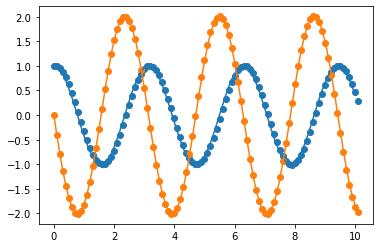

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

dt = 0.1
tmax = 10

x0 = 1
vx0 = 0
omega = 2

t = 0
x = x0
vx = vx0

tpoints = [t]
xpoints = [x]
vxpoints = [vx]

while t < tmax:
    x_new = x + vx * dt
    vx_new = vx - omega ** 2 * x_new * dt  # symplectic
    
    x = x_new
    vx = vx_new
    t = t + dt
    
    tpoints.append(t)
    xpoints.append(x)
    vxpoints.append(vx)

# exact solution
t = np.linspace(0, tmax, 100)
x = x0 * np.cos(omega * t) + vx0 / omega * np.sin(omega * t)
vx = - x0 * omega * np.sin(omega * t) + vx0 * np.cos(omega * t)

plt.plot(t, x)    
plt.plot(t, vx)    
plt.scatter(tpoints, xpoints)
plt.scatter(tpoints, vxpoints)
plt.show()

## ヒッグス・ポテンシャル

In [9]:
# Works on Jupyter notebook, Google Colaboratory,
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def f(lam=0.13, v=246):
    phi = np.linspace(-400, 400, 1000)
    y = lam * (phi**2 / 2 - v ** 2 / 2) ** 2
    plt.plot(phi, y)
    plt.show()
    
interact(f, lam=(0.0, 0.2, 0.01), v=(0, 400, 1));

interactive(children=(FloatSlider(value=0.13, description='lam', max=0.2, step=0.01), IntSlider(value=246, des…